## Set Up

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy 
import json
import matplotlib.pyplot as plt

%matplotlib inline

### Set Up Twitter's API




In [2]:
consumer_secret = ''
access_token = ''
consumer_key = ''
access_token_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

## Gathering Data

### Load/Read CSV Fils

> Load the twitter-archive-enhanced.csv file into archive_df

In [3]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv')
archive_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


### s

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 

response = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
img_df = pd.read_csv('image_predictions.tsv', sep='\t')
img_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Get Tweets by Twitter's API

> Get Tweet by its id (id: from archive_df) with all its data, and store it into tweets_found list. If the tweet not found the id will store in tweets_not_found list.

In [5]:
def load_tweets():
    tweets_found = []
    tweets_not_found = []
    nm = 0
    for tweet_id in archive_df['tweet_id']:
        try:
            nm += 1
            print(str(nm), end =" ") 
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json_content = tweet._json        

            tweets_found.append(json_content)
        except Exception as e:
            tweets_not_found.append(tweet_id)
            
    print('Number of Tweets found: {}.\nNumber of Tweets not found: {}.'.format(len(tweets_found), len(tweets_not_found)))
    return tweets_found

# tweets_found = load_tweets()

### Write Tweets Found into JSON File

> After I store tweets in tweets_found list I will write those tweets into json file tweet_json.txt.

> Based on JSON format:
>* After I open tweet_json.txt file, I write " [ ".
>* Then I write the tweet and comma with new line (tweet by tweet).
>* If tweet is the last tweet I don't write comma. 
>* In the last I write " ] ".

In [6]:
def write_tweets():
    with open('tweet_json.txt', 'w', encoding='utf-8') as outfile:
        outfile.write('[')
        for tweet in tweets_found:
            json.dump(tweet, outfile)
            
            if tweet is not tweets_found[-1]:
                outfile.write(',\n')
            else:
                outfile.write('')
        outfile.write(']')
        
# write_tweets()

### Read My tweet_json File
> Read tweets and store into "tweets".

In [7]:
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    tweets = json.load(json_file)

### Number of Retweeted Tweets



In [8]:
nm = 0
index = 0
retweeted_status = []

for tweet in tweets:
    if 'retweeted_status' in dict(tweet):
        nm += 1
        retweeted_status.append(True)
    else :
        retweeted_status.append(False)
    index += 1
nm

166

### Create New DF for Tweets

> After we write the tweets into tweet_json.txt and read those tweets then remove retweeted tweets, now I will store "tweets" into dataframe "tweets_df".

In [9]:
tweets_dict = []

for tweet in tweets:
    tweets_dict.append({'tweet_id': tweet['id'],
                         'favorite_count': tweet['favorite_count'],
                         'retweet_count': tweet['retweet_count'],
                        })

tweets_df = pd.DataFrame(tweets_dict, columns = ['tweet_id', 'favorite_count','retweet_count'])
tweets_df["retweeted_status"] = retweeted_status # False not retweeted, True is retweeted
tweets_df.head(5)

,tweet_id,favorite_count,retweet_count,retweeted_status
0,892420643555336193,37474,8162,False
1,892177421306343426,32209,6040,False
2,891815181378084864,24279,3998,False
3,891689557279858688,40796,8314,False
4,891327558926688256,39013,9011,False


## Assessing Data

### 1. Assess | archive_df

In [10]:
archive_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
archive_df.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


* Missing Valuse (NaNs and None)

In [12]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
sum(archive_df['tweet_id'].duplicated())

0

In [14]:
archive_df['retweeted_status_id'].count()

181

* timestamp and retweeted_status_timestamp are object (not DateTime)

In [15]:
archive_df['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [16]:
archive_df['name'].value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Penny         10
Lola          10
Tucker        10
Bo             9
Winston        9
the            8
Sadie          8
an             7
Daisy          7
Bailey         7
Toby           7
Buddy          7
Leo            6
Koda           6
Rusty          6
Oscar          6
Jax            6
Bella          6
Dave           6
Stanley        6
Scout          6
Milo           6
Jack           6
Phil           5
            ... 
Chesney        1
Gordon         1
Harvey         1
Goose          1
Anna           1
Roscoe         1
Oreo           1
Aja            1
Ito            1
Skittles       1
Scruffers      1
Zuzu           1
Schnozz        1
Dudley         1
Ralphus        1
Crumpet        1
Bobb           1
Mairi          1
Duddles        1
Leonidas       1
Brutus         1
Geoff          1
Comet          1
Margo          1
Franq          1
Mo             1
Baron          1
Birf          

In [17]:
archive_df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [18]:
archive_df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [19]:
archive_df['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [20]:
archive_df['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [21]:
archive_df['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [22]:
archive_df['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [23]:
len(archive_df[archive_df.retweeted_status_id.isnull() == False])


181

### 2. Assess | tweets_df

In [24]:
tweets_df.head(5)

,tweet_id,favorite_count,retweet_count,retweeted_status
0,892420643555336193,37474,8162,False
1,892177421306343426,32209,6040,False
2,891815181378084864,24279,3998,False
3,891689557279858688,40796,8314,False
4,891327558926688256,39013,9011,False


In [25]:
tweets_df.tail(5)

,tweet_id,favorite_count,retweet_count,retweeted_status
2330,666049248165822465,104,41,False
2331,666044226329800704,288,135,False
2332,666033412701032449,120,43,False
2333,666029285002620928,124,46,False
2334,666020888022790149,2498,492,False


In [26]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 4 columns):
tweet_id            2335 non-null int64
favorite_count      2335 non-null int64
retweet_count       2335 non-null int64
retweeted_status    2335 non-null bool
dtypes: bool(1), int64(3)
memory usage: 57.1 KB


In [27]:
sum(tweets_df['tweet_id'].duplicated())

0

In [28]:
tweets_df['favorite_count'].value_counts()

0        166
2553       4
2138       4
1258       3
3495       3
161        3
242        3
2730       3
2518       3
2246       3
737        3
557        2
328        2
326        2
1571       2
1119       2
748        2
2302       2
5476       2
2223       2
952        2
758        2
1971       2
26967      2
2882       2
3519       2
1103       2
2393       2
4442       2
354        2
        ... 
6780       1
2654       1
4729       1
629        1
11684      1
6714       1
2620       1
2624       1
45633      1
12867      1
41541      1
10822      1
29255      1
6728       1
8783       1
149        1
21075      1
21079      1
2519       1
23134      1
2658       1
586        1
6758       1
2664       1
912        1
17339      1
623        1
625        1
2674       1
20525      1
Name: favorite_count, Length: 1985, dtype: int64

In [29]:
tweets_df['retweet_count'].value_counts()


372      5
88       5
567      4
55       4
500      4
523      4
475      4
463      4
1233     4
545      4
105      4
399      4
57       4
1082     4
228      4
131      4
43       4
692      4
294      4
3644     4
243      4
772      4
569      4
232      4
46       4
1031     4
370      3
1039     3
1120     3
6210     3
        ..
4149     1
18486    1
1247     1
2104     1
3294     1
9437     1
63       1
2112     1
456      1
1243     1
4139     1
41       1
2060     1
39       1
6158     1
2064     1
53       1
19       1
4119     1
25       1
8219     1
29       1
31       1
33       1
34850    1
3298     1
6180     1
4133     1
2086     1
2092     1
Name: retweet_count, Length: 1706, dtype: int64

### 3. Assess | img_df

In [30]:
img_df.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [31]:
img_df.tail(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [32]:
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [33]:
sum(img_df["tweet_id"].duplicated())

0

In [34]:
sum(img_df["jpg_url"].duplicated())

66

In [35]:
img_df['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [36]:
img_df['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
Cardigan                      19
web_site                      19
teddy                         18
Eskimo_dog                    18
Maltese_dog                   18
Shetland_sheepdog             18
beagle                        18
Shih-Tzu                      17
Rottweiler                    17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

In [37]:
img_df['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [38]:
img_df['p2'].value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
Eskimo_dog                         27
collie                             27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
toy_terrier                        20
Samoyed                            20
chow                               20
malinois                           20
miniature_pinscher                 20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [39]:
img_df['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [40]:
img_df['p3'].value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
beagle                            31
cocker_spaniel                    31
Pekinese                          29
Pomeranian                        29
toy_poodle                        29
Great_Pyrenees                    27
Chesapeake_Bay_retriever          27
Pembroke                          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
d

In [41]:
img_df['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

### Quality Issues
* #### archive_df

    * timestamp and retweeted_status_timestamp are object type instead of datetime.
    * source is HTML format.
    * There are records have more than one dog stage.
    * name has missing values with "None" instead of NaN.
    * doggo, floofer, pupper, and puppo have missing values with "None" instead of NaN
    * There are many columns in this dataframe making it hard to read, and some will not be needed for analysis. 

* #### tweets_df
    * There are 166 retweeted. Keep only original tweets.


* #### img_df
    * There are 2075 images, but archive_df contain 2335 tweets. there are 260 missing (maybe some of tweets doesn't contain image).
    * There are 66 images are duplicated.


### Tidiness Issues
* #### archive_df
    * doggo, floofer, pupper, and puppo are unique columns instead one column "dog_stage"
    * Split timestamp into day, month and year (3 columns).

* #### tweets_df
    * twitter2 data should be combined with the twitter1 data since they are information about the same tweet

* #### img_df
    * images data could be combined with the twitter1 data as well since it is all information about 1 tweet
    

## Cleaning Data

### Set Up

In [42]:
archive_clean_df = archive_df.copy()
tweets_clean_df = tweets_df.copy()
img_clean_df = img_df.copy()

In [43]:
img_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Quality Issues
### 1. archive_df

* #### Issue 1.1: 

### Define


Replace all values in timestamp and retweeted_status_timestamp to datetime type instead of object type



### Code

In [44]:
archive_clean_df['timestamp'] = pd.to_datetime(archive_clean_df['timestamp'])
archive_clean_df['retweeted_status_timestamp'] = pd.to_datetime(archive_clean_df['retweeted_status_timestamp'])

### Test

In [45]:
archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime

* #### Issue 1.2: 

### Define


Replace all values in source from HTML format to text



### Code

In [46]:
archive_clean_df["source"] = archive_clean_df["source"].str.replace(r'<(?:a\b[^>]*>|/a>)', '')

### Test

In [47]:
archive_clean_df["source"].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

* #### Issue 1.3: 

### Define

There are records have more than one dog stage like doggo and pupper together, I should check and set one value because in tidiness issues I will meagre those columns to one column.




### Code

In [48]:
print('doggo with floofer:', len(archive_clean_df[(archive_clean_df.doggo != 'None') & (archive_clean_df.floofer != 'None')]))
print('doggo with pupper:', len(archive_clean_df[(archive_clean_df.doggo != 'None') & (archive_clean_df.pupper != 'None')]))
print('doggo with puppo:', len(archive_clean_df[(archive_clean_df.doggo != 'None') & (archive_clean_df.puppo != 'None')]))

# More Check...
print('floofer with pupper:', len(archive_clean_df[(archive_clean_df.floofer != 'None') & (archive_clean_df.pupper != 'None')]))
print('floofer with puppo:', len(archive_clean_df[(archive_clean_df.floofer != 'None') & (archive_clean_df.puppo != 'None')]))
print('pupper with puppo:', len(archive_clean_df[(archive_clean_df.pupper != 'None') & (archive_clean_df.puppo != 'None')]))

doggo with floofer: 1
doggo with pupper: 12
doggo with puppo: 1
floofer with pupper: 0
floofer with puppo: 0
pupper with puppo: 0


doggo with pupper are 12 records. I will set pupper None because pupper is small doggo. 

In [49]:
archive_clean_df.floofer.loc[(archive_clean_df.doggo != 'None') & (archive_clean_df.floofer != 'None')] = 'None'
archive_clean_df.pupper.loc[(archive_clean_df.doggo != 'None') & (archive_clean_df.pupper != 'None')] = 'None'
archive_clean_df.puppo.loc[(archive_clean_df.doggo != 'None') & (archive_clean_df.puppo != 'None')] = 'None'

c:\users\al_ya\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


### Test

In [50]:
print('doggo with floofer:', len(archive_clean_df[(archive_clean_df.doggo != 'None') & (archive_clean_df.floofer != 'None')]))
print('doggo with pupper:', len(archive_clean_df[(archive_clean_df.doggo != 'None') & (archive_clean_df.pupper != 'None')]))
print('doggo with puppo:', len(archive_clean_df[(archive_clean_df.doggo != 'None') & (archive_clean_df.puppo != 'None')]))

doggo with floofer: 0
doggo with pupper: 0
doggo with puppo: 0


* #### Issue 1.4: 

### Define



 name column has missing values with "None" instead of NaN.


### Code

In [51]:
archive_clean_df['name'].replace('None', np.nan, inplace = True)

### Test

In [52]:
archive_clean_df['name'].value_counts()

a            55
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Lola         10
Tucker       10
Penny        10
Bo            9
Winston       9
the           8
Sadie         8
Bailey        7
Buddy         7
an            7
Daisy         7
Toby          7
Koda          6
Oscar         6
Jax           6
Rusty         6
Milo          6
Stanley       6
Bella         6
Scout         6
Jack          6
Leo           6
Dave          6
Bentley       5
very          5
             ..
Chesney       1
Gordon        1
Harvey        1
Goose         1
Anna          1
Gabby         1
Oreo          1
Aja           1
Ito           1
Skittles      1
Scruffers     1
Zuzu          1
Schnozz       1
Dudley        1
Ralphus       1
Crumpet       1
Bobb          1
Mairi         1
Duddles       1
Leonidas      1
Brutus        1
Geoff         1
Comet         1
Margo         1
Franq         1
Mo            1
Baron         1
Birf          1
Willow        1
Rose          1
Name: name, Length: 956,

* #### Issue 1.5: 

### Define


doggo, floofer, pupper, and puppo have missing values with "None" instead of NaN



### Code

In [53]:
archive_clean_df['doggo'].replace('None', np.nan, inplace = True)
archive_clean_df['floofer'].replace('None', np.nan, inplace = True)
archive_clean_df['pupper'].replace('None', np.nan, inplace = True)
archive_clean_df['puppo'].replace('None', np.nan, inplace = True)

### Test

In [54]:
doggo = archive_clean_df['doggo'].value_counts()
floofer = archive_clean_df['floofer'].value_counts()
pupper = archive_clean_df['pupper'].value_counts()
puppo = archive_clean_df['puppo'].value_counts()

print(doggo , "\n")
print(floofer, "\n")
print(pupper, "\n")
print(puppo)

doggo    97
Name: doggo, dtype: int64 

floofer    9
Name: floofer, dtype: int64 

pupper    245
Name: pupper, dtype: int64 

puppo    29
Name: puppo, dtype: int64


* #### Issue 1.6: 

### Define


There are 181 retweeted tweets. Keep only original tweets by delete not NaN values in retweeted_status_id


### Code

In [55]:
archive_clean_df = archive_clean_df[np.isnan(archive_clean_df["retweeted_status_id"])]

### Test

In [56]:
archive_clean_df['retweeted_status_id'].count()

0

* #### Issue 1.7: 

### Define


There are many columns in this dataframe making it hard to read, and some will not be needed for analysis, so I will  delete unneeded columns:
* in_reply_to_status_id
* in_reply_to_user_id
* retweeted_status_id	
* retweeted_status_user_id
* retweeted_status_timestamp
* expanded_urls


### Code

In [57]:
archive_clean_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                      'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], axis=1, inplace=True)

### Test

In [58]:
archive_clean_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [59]:
archive_clean_df.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,NaN,NaN,NaN


In [60]:
archive_clean_df[['rating_numerator', 'rating_denominator']] = archive_clean_df[['rating_numerator','rating_denominator']].astype(float)

archive_clean_df['rating'] =10 * archive_clean_df['rating_numerator'] / archive_clean_df['rating_denominator'].astype(float)

archive_clean_df['rating_numerator'].value_counts()







12.0      500
10.0      442
11.0      426
13.0      307
9.0       156
8.0        98
7.0        54
14.0       43
5.0        36
6.0        32
3.0        19
4.0        17
2.0         9
1.0         8
0.0         2
420.0       2
84.0        1
24.0        1
27.0        1
15.0        1
17.0        1
960.0       1
143.0       1
99.0        1
666.0       1
121.0       1
182.0       1
165.0       1
45.0        1
75.0        1
204.0       1
1776.0      1
80.0        1
88.0        1
144.0       1
26.0        1
20.0        1
44.0        1
60.0        1
50.0        1
Name: rating_numerator, dtype: int64

### 2. tweets_df

* #### Issue 2.1: 

### Define


There are 166 retweeted. Keep only original tweets by retweeted_status column:
* False mean original tweet.
* True mean retweeted tweet.



### Code

In [61]:
tweets_clean_df.drop(tweets_clean_df[tweets_clean_df.retweeted_status == True].index, inplace=True)

### Test

In [62]:
tweets_clean_df.retweeted_status.value_counts()

False    2169
Name: retweeted_status, dtype: int64

> After I delete retweeted tweets, I will drop retweeted_status column.

In [63]:
tweets_clean_df.drop(['retweeted_status'], axis=1, inplace=True)
tweets_clean_df.head(3)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,37474,8162
1,892177421306343426,32209,6040
2,891815181378084864,24279,3998


### Tidiness Issues


* #### Issue 1: 

### Define

doggo, floofer, pupper, and puppo are unique columns instead one column, So I will meagre to one column "dog_stage".



archive_clean_df['dog_stage'] = archive_clean_df[archive_clean_df.columns[7:]].apply(
    lambda x: ','.join(x.astype(str) if x is not np.nan else 'None'),
    axis=1
)

### Code

In [64]:
archive_clean_df['dog_stage'] = archive_clean_df[archive_clean_df.columns[7:11]].apply(
    lambda x: ','.join(x.dropna().astype(str)), axis=1
)

# Set null vales as NaNs.
archive_clean_df['dog_stage'] = archive_clean_df['dog_stage'].apply(
    lambda x: np.nan if x is '' else x
)

### Test

In [65]:
print(archive_clean_df['pupper'].value_counts())
print(archive_clean_df['doggo'].value_counts())
print(archive_clean_df['puppo'].value_counts())
print(archive_clean_df['floofer'].value_counts())
print()
print(archive_clean_df['dog_stage'].value_counts())

pupper    224
Name: pupper, dtype: int64
doggo    87
Name: doggo, dtype: int64
puppo    24
Name: puppo, dtype: int64
floofer    9
Name: floofer, dtype: int64

pupper     224
doggo       87
puppo       24
floofer      9
Name: dog_stage, dtype: int64


In [66]:
archive_clean_df['dog_stage'].replace(np.nan, np.nan, inplace = True)

archive_clean_df[['dog_stage','doggo', 'floofer', 'pupper', 'puppo']].head(15)

,dog_stage,doggo,floofer,pupper,puppo
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
9,doggo,doggo,NaN,NaN,NaN


Final,, Drop those columns...

In [67]:
archive_clean_df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)
archive_clean_df.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,rating,dog_stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,13.0,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,13.0,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,12.0,NaN


* #### Issue 2: 

### Define

Merge all the 3 dataframe to one dataframe based on tweet_id 

### Code

In [68]:
f_df = archive_clean_df.merge(tweets_clean_df,how='outer', on='tweet_id')
f_df = f_df.merge(img_clean_df,how='outer', on='tweet_id')

# To show all columns.
pd.set_option('display.max_columns', None)
f_df.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,rating,dog_stage,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,13.0,NaN,37474.0,8162.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,13.0,NaN,32209.0,6040.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,12.0,NaN,24279.0,3998.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


### Test

In [69]:
f_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2256 entries, 0 to 2255
Data columns (total 22 columns):
tweet_id              2256 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  1495 non-null object
rating                2175 non-null float64
dog_stage             344 non-null object
favorite_count        2169 non-null float64
retweet_count         2169 non-null float64
jpg_url               2075 non-null object
img_num               2075 non-null float64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null object
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null object
p3                    2075 non-null object
p3_conf            

After I merge the 3 dataframes there are missing tweet's valuse, so I will delete those tweets.

In [70]:
f_df.dropna(subset=['text'], inplace=True)
f_df.dropna(subset=['jpg_url'], inplace=True)

f_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2174
Data columns (total 22 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
name                  1448 non-null object
rating                1994 non-null float64
dog_stage             306 non-null object
favorite_count        1988 non-null float64
retweet_count         1988 non-null float64
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf            

## Storing data

In [71]:
f_df.to_csv('twitter_archive_master.csv',  index=False)

## Analyzing and Visualizing Data

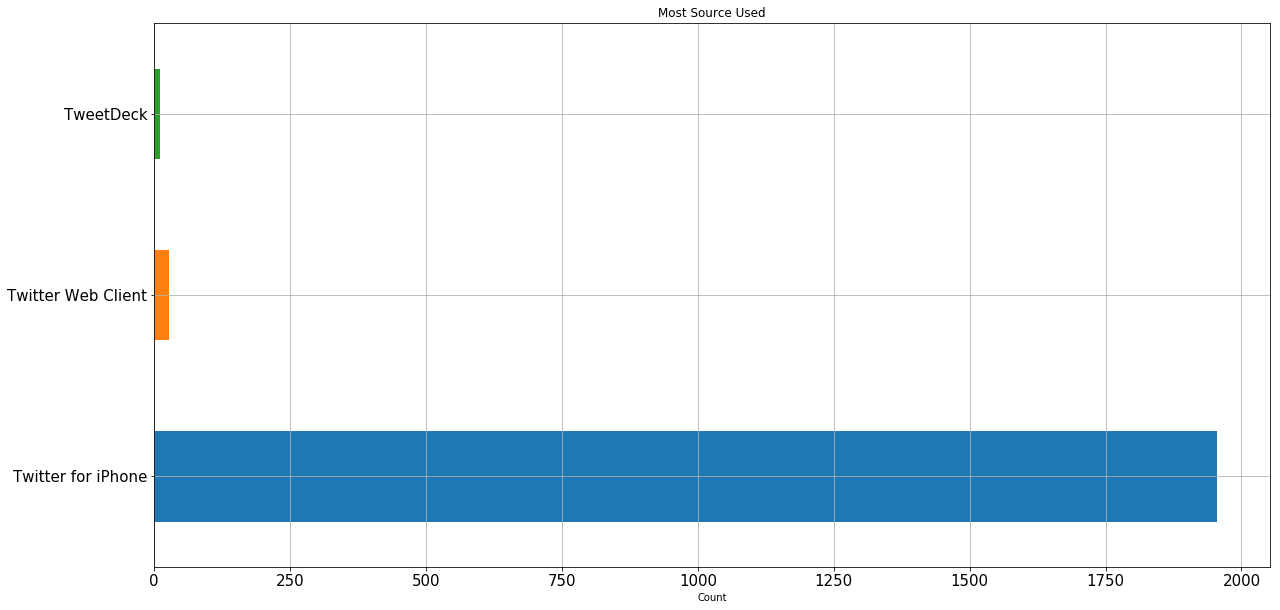

In [72]:
temp_df = f_df['source'].value_counts()

temp_df.plot(kind='barh', figsize=(20,10),grid=True, fontsize =15,
             title = 'Most Source Used').set_xlabel('Count')
 
plt.show()

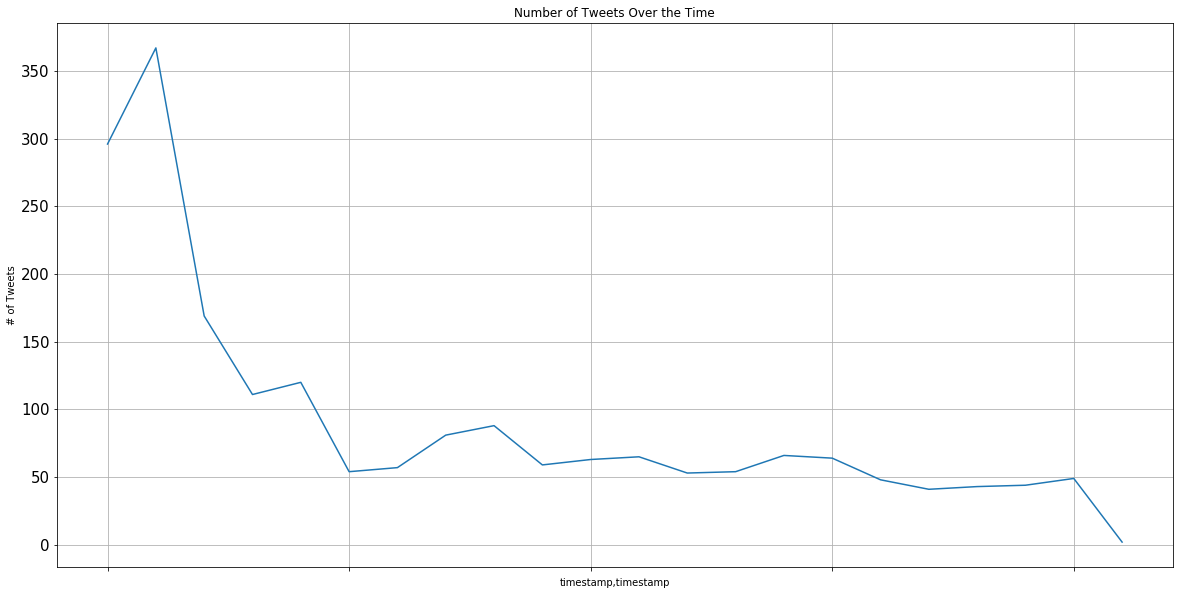

In [73]:
temp_df = f_df.tweet_id.groupby([f_df["timestamp"].dt.year, f_df["timestamp"].dt.month]).count()

temp_df.plot(kind='line', figsize=(20,10),grid=True, fontsize =15,
             title = 'Number of Tweets Over the Time').set_ylabel('# of Tweets')
 
plt.show()

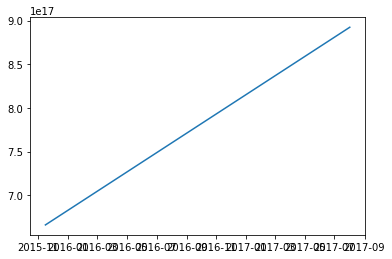

In [74]:
plt.plot(f_df['timestamp'], f_df['tweet_id'])
plt.show()

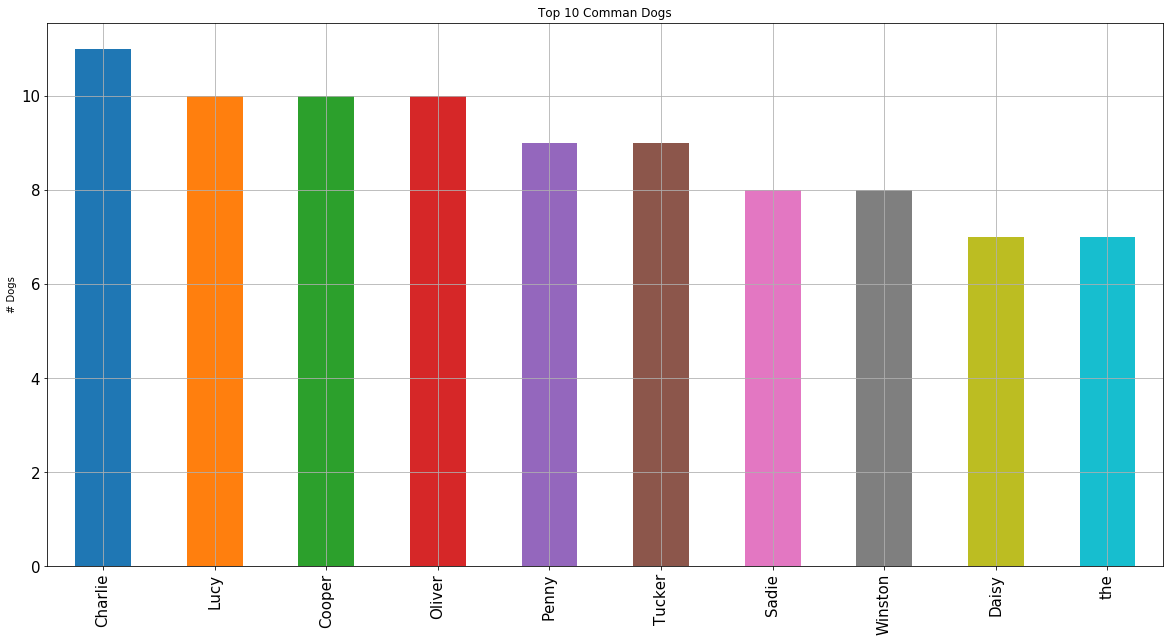

In [75]:
temp_df = f_df.name.value_counts()[1:11]

temp_df.plot(kind='bar', figsize=(20,10),grid=True, fontsize =15,
             title = 'Top 10 Comman Dogs').set_ylabel('# Dogs')
 
plt.show()